In [736]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [737]:
df = pd.read_csv("Dataset.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df.dropna(ignore_index=True, thresh=5, axis='rows', inplace=True)
df.dropna(ignore_index=True,subset=['Rain the day after', 'Rain that day'], axis='rows', inplace=True)
df.head(5)

,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Station 2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Station 2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


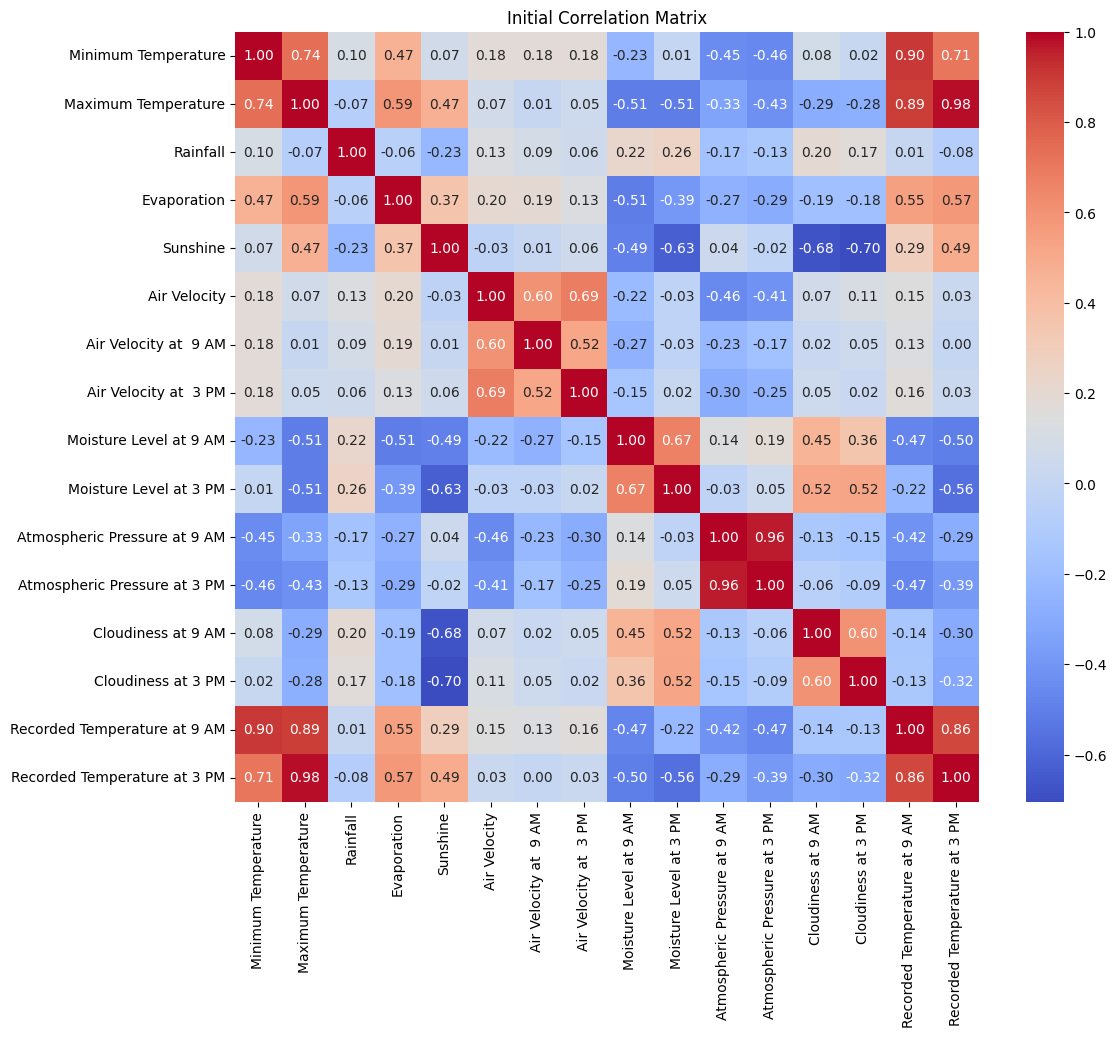

In [738]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the initial correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Initial Correlation Matrix')
plt.show()

Selected columns after removing highly correlated features:
Index(['Minimum Temperature', 'Maximum Temperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'Air Velocity', 'Air Velocity at  9 AM',
       'Air Velocity at  3 PM', 'Moisture Level at 9 AM',
       'Moisture Level at 3 PM', 'Atmospheric Pressure at 9 AM',
       'Cloudiness at 9 AM', 'Cloudiness at 3 PM'],
      dtype='object')


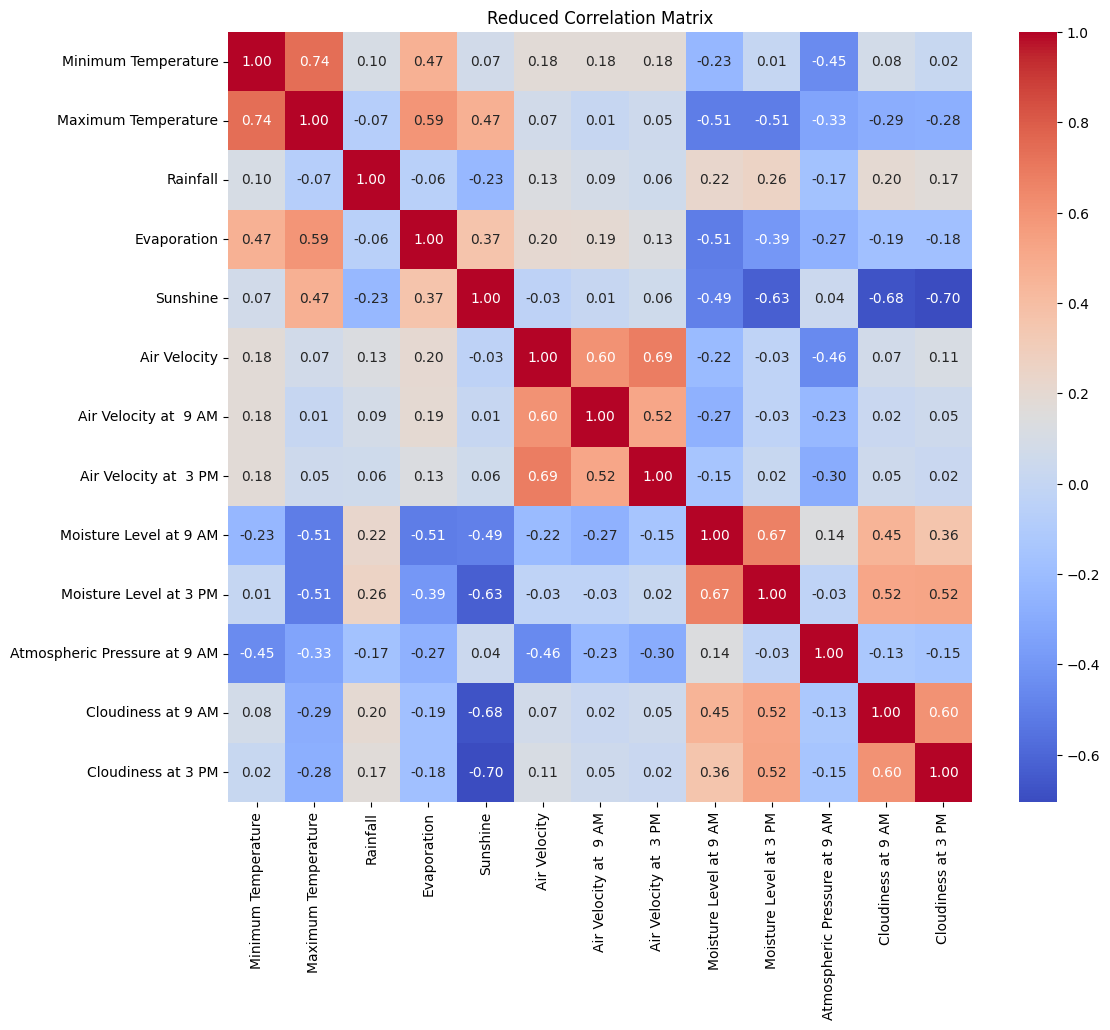

In [739]:
threshold = 0.8

# Function to remove highly correlated features
def remove_highly_correlated_features(corr_matrix, threshold):
    columns = np.full(corr_matrix.shape[0], True, dtype=bool)
    for i in range(corr_matrix.shape[0]):
        for j in range(i + 1, corr_matrix.shape[0]):
            if corr_matrix.iloc[i, j] > threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = corr_matrix.columns[columns]
    return selected_columns

# Remove highly correlated features
selected_columns = remove_highly_correlated_features(correlation_matrix, threshold)
reduced_df = df[selected_columns]

# Print the selected columns
print("Selected columns after removing highly correlated features:")
print(selected_columns)

# Recalculate the correlation matrix for the reduced DataFrame
reduced_correlation_matrix = reduced_df.corr()

# Plot the correlation matrix for the reduced DataFrame
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Reduced Correlation Matrix')
plt.show()

## Convert to numerical and seperate Test & Train

In [740]:
df['Rain the day after'].replace('No', 0, inplace=True)
df['Rain the day after'].replace('Yes', 1, inplace=True)
df['Rain that day'].replace('No', 0, inplace=True)
df['Rain that day'].replace('Yes', 1, inplace=True)

In [741]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(['Date'], axis=1)

In [742]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [743]:
train.head(5)

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after,Month,Year
119008,Station 31,13.5,26.0,0.0,5.8,12.6,SW,33.0,ENE,SW,...,1018.7,1016.2,0.0,1.0,21.4,24.8,0,0,11,2015
68281,Station 20,16.0,30.0,0.0,11.2,3.7,N,43.0,N,N,...,1021.5,1019.8,5.0,8.0,25.6,29.8,0,0,10,2011
42953,Station 47,19.0,26.3,0.0,NaN,NaN,NE,41.0,NNW,NNE,...,1017.0,1013.2,NaN,NaN,21.8,24.4,0,0,3,2015
91339,Station 39,14.7,27.2,0.0,6.0,9.7,E,50.0,SSW,E,...,1021.0,1018.7,4.0,5.0,21.7,25.8,0,0,5,2013
26428,Station 34,5.7,15.5,0.0,NaN,NaN,ESE,11.0,NaN,WSW,...,1008.5,1005.3,NaN,NaN,8.8,15.0,0,0,6,2009


## Replace NaN values

In [744]:
train.isnull().sum()

Weather Station                     0
Minimum Temperature               375
Maximum Temperature               245
Rainfall                            0
Evaporation                     47829
Sunshine                        53509
Gust Trajectory                  7327
Air Velocity                     7274
Gust Trajectory at  9 AM         7700
Gust Trajectory at  3 PM         2956
Air Velocity at  9 AM             844
Air Velocity at  3 PM            2052
Moisture Level at 9 AM           1186
Moisture Level at 3 PM           2807
Atmospheric Pressure at 9 AM    10994
Atmospheric Pressure at 3 PM    11026
Cloudiness at 9 AM              42111
Cloudiness at 3 PM              44836
Recorded Temperature at 9 AM      517
Recorded Temperature at 3 PM     2121
Rain that day                       0
Rain the day after                  0
Month                               0
Year                                0
dtype: int64

In [745]:
def fill_null(df):
    ordinal_cols = ['Cloudiness at 9 AM', 'Cloudiness at 3 PM'] 
    nominal_cols = ['Gust Trajectory at  9 AM', 'Gust Trajectory at  3 PM', 'Gust Trajectory']  
    numeric_cols = ['Minimum Temperature', 'Maximum Temperature',
        'Rainfall', 'Evaporation', 'Air Velocity',
        'Air Velocity at  9 AM', 'Air Velocity at  3 PM',
        'Moisture Level at 9 AM', 'Moisture Level at 3 PM',
        'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM',
        'Recorded Temperature at 9 AM', 'Recorded Temperature at 3 PM', 'Sunshine']  

    # Handle missing values based on column types, month, and year
    for col in numeric_cols:
        imputer = SimpleImputer(strategy="mean")
        df[col] = df.groupby(['Year', 'Month'])[col].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).reshape(-1))

    for col in ordinal_cols:
        imputer = SimpleImputer(strategy="median")
        df[col] = df.groupby(['Year', 'Month'])[col].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).reshape(-1))

    for col in nominal_cols:
        imputer = SimpleImputer(strategy="most_frequent")
        df[col] = df.groupby(['Year', 'Month'])[col].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).reshape(-1))

In [746]:
fill_null(train)
train.isnull().sum()

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
Rain that day                   0
Rain the day after              0
Month                           0
Year                            0
dtype: int64

In [747]:
fill_null(test)
test.isnull().sum()

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
Rain that day                   0
Rain the day after              0
Month                           0
Year                            0
dtype: int64

In [748]:
test = pd.get_dummies(test, columns = ['Gust Trajectory at  3 PM', 'Gust Trajectory at  9 AM', 'Gust Trajectory', 'Weather Station'], dtype
= int)
train = pd.get_dummies(train, columns = ['Gust Trajectory at  3 PM', 'Gust Trajectory at  9 AM', 'Gust Trajectory', 'Weather Station'], dtype
= int)

In [749]:
test.isnull().sum()

Minimum Temperature          0
Maximum Temperature          0
Rainfall                     0
Evaporation                  0
Sunshine                     0
                            ..
Weather Station_Station 5    0
Weather Station_Station 6    0
Weather Station_Station 7    0
Weather Station_Station 8    0
Weather Station_Station 9    0
Length: 117, dtype: int64

## Balancing data

In [750]:
print("Train: ", (train['Rain the day after'] == 0).sum(), (train['Rain the day after'] == 1).sum())
print("Test: ", (test['Rain the day after'] == 0).sum(), (test['Rain the day after'] == 1).sum())

Train:  87689 24940
Test:  21897 6261


In [751]:
# balance data
from imblearn.over_sampling import SMOTE

feature = list(train.columns)
feature.remove('Rain the day after')

rus = SMOTE(random_state=42)

x_res, y_res = rus.fit_resample(train[feature], train['Rain the day after'])
train = pd.concat([x_res, y_res], axis=1)
print((train['Rain the day after'] == 0).sum(), (train['Rain the day after'] == 1).sum())

x_res, y_res = rus.fit_resample(test[feature], test['Rain the day after'])
test = pd.concat([x_res, y_res], axis=1)
print((test['Rain the day after'] == 0).sum(), (test['Rain the day after'] == 1).sum())

87689 87689
21897 21897


In [752]:
test.head(5)


,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Air Velocity,Air Velocity at 9 AM,Air Velocity at 3 PM,Moisture Level at 9 AM,Moisture Level at 3 PM,...,Weather Station_Station 45,Weather Station_Station 46,Weather Station_Station 47,Weather Station_Station 48,Weather Station_Station 5,Weather Station_Station 6,Weather Station_Station 7,Weather Station_Station 8,Weather Station_Station 9,Rain the day after
0,18.2,25.0,0.0,9.400000,1.500000,33.000000,9.0,9.0,41.0,34.0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,19.2,0.0,1.600000,8.000000,43.000000,26.0,17.0,76.0,52.0,...,0,0,0,0,0,0,0,0,0,1
2,19.1,38.5,0.0,11.400000,12.800000,52.000000,19.0,22.0,21.0,9.0,...,0,0,0,1,0,0,0,0,0,0
3,8.4,17.5,0.0,5.030496,8.012698,54.000000,22.0,26.0,47.0,44.0,...,0,0,0,0,0,0,0,0,0,0
4,9.5,14.5,2.4,3.000000,5.300000,44.552632,19.0,9.0,58.0,53.0,...,0,0,0,0,0,0,0,0,0,0


## Delete Noise

In [753]:
print(train.shape[0], test.shape[0])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(train)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Find the distance of each point to its closest centroid
closest, distances = pairwise_distances_argmin_min(train, centroids)
threshold = np.percentile(distances, 98)
noise_mask = distances > threshold
train = train[~noise_mask]

closest, distances = pairwise_distances_argmin_min(test, centroids)
threshold = np.percentile(distances, 98)
noise_mask = distances > threshold
test = test[~noise_mask]

print(train.shape[0], test.shape[0])


175378 43794


/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


171870 42918


## Decision Tree

In [754]:
def decision_tree(test, train, ccp_alpha=0, pca_number=1, split=2, depth=100000, loop='None'):
    
    feature = list(train.columns)
    feature.remove('Rain the day after')

    x_train = train[feature]
    y_train = train['Rain the day after']

    x_test = test[feature]
    y_test = test['Rain the day after']
    
    if pca_number > 1 and loop != 'PCA':
        
        scaler_train = StandardScaler()
        scaler_test = StandardScaler()
        
        x_train = scaler_train.fit_transform(x_train)
        x_test = scaler_test.fit_transform(x_test)

        # Perform PCA
        pca = PCA(n_components=pca_number)
        x_train = pd.DataFrame(pca.fit_transform(x_train))
        x_test = pd.DataFrame(pca.fit_transform(x_test))
    
    if loop == 'None':
        
        dtree = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, ccp_alpha=ccp_alpha)
        dtree.fit(x_train, y_train)
        
        y_pred_test = dtree.predict(x_test)
        y_pred_train = dtree.predict(x_train)
        
        train_result = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        test_result = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

        print("Train Precision: ", train_result[0], "   Train Recall: ", train_result[1], "    Train Fscore: ", train_result[2])
        print("Test Precision: ", test_result[0], "   Test Recall: ", test_result[1], "    Test Fscore: ", test_result[2])
        
        cm = confusion_matrix(y_test, y_pred_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.show()

        return
    
    test_accuracies = []
    train_accuracies = []
    x = []
    fig, ax = plt.subplots()
    
    best_test_accuracy = -1
    best_train_accuracy = -1
    best_test_param = -1
    best_train_param = -1
        
    if loop == 'PCA':
        
        scaler_train = StandardScaler()
        scaler_test = StandardScaler()
        
        x_train = scaler_train.fit_transform(x_train)
        x_test = scaler_test.fit_transform(x_test)
            
        for p in range(2, pca_number+1):

            # Perform PCA
            pca = PCA(n_components=p)
            x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
            x_test_pca = pd.DataFrame(pca.fit_transform(x_test))
    
            
            dtree = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, ccp_alpha=ccp_alpha)
            dtree.fit(x_train_pca, y_train)
            
            y_pred_test = dtree.predict(x_test_pca)
            y_pred_train = dtree.predict(x_train_pca)
            
            accuracy_test = accuracy_score(y_test, y_pred_test)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            
            if best_test_accuracy < accuracy_test:
                best_test_accuracy = accuracy_test
                best_test_param = p
                
            if best_train_accuracy < accuracy_train:
                best_train_accuracy = accuracy_train
                best_train_param = p
                
            x.append(p)
            test_accuracies.append(accuracy_test)
            train_accuracies.append(accuracy_train)
            print("PCA:", p, "    Test Accuracy:", accuracy_test, "    Train Accuracy:", accuracy_train)
            
        ax.set_xlabel("PCA")
        ax.set_title("Accuracy vs PCA for training and testing sets")       
    
    if loop == 'Depth':
         
        for d in range(1, depth+1):
            dtree = DecisionTreeClassifier(max_depth=d, min_samples_split=split, ccp_alpha=ccp_alpha)
            dtree.fit(x_train, y_train)
            
            y_pred_test = dtree.predict(x_test)
            y_pred_train = dtree.predict(x_train)
            
            accuracy_test = accuracy_score(y_test, y_pred_test)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            
            if best_test_accuracy < accuracy_test:
                best_test_accuracy = accuracy_test
                best_test_param = d
                
            if best_train_accuracy < accuracy_train:
                best_train_accuracy = accuracy_train
                best_train_param = d
            
            test_accuracies.append(accuracy_test)
            train_accuracies.append(accuracy_train)
            x.append(d)
            print("Depth:", d, "    Test Accuracy:", accuracy_test, "    Train Accuracy:", accuracy_train)

        ax.set_xlabel("depth")
        ax.set_title("Accuracy vs depth for training and testing sets")
            
    if loop == 'Alpha':
        
        path = tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=split).cost_complexity_pruning_path(x_train, y_train)
        ccp_alphas, impurities = path.ccp_alphas, path.impurities
        
        ccp_alphas.sort()
        size = ccp_alphas.shape[0]
        i = 0
        while (i < ccp_alphas.shape[0]):
            dtree = DecisionTreeClassifier(ccp_alpha=ccp_alphas[i], max_depth=depth, min_samples_split=split)
            dtree.fit(x_train, y_train)
            x.append(ccp_alphas[i])
            y_pred_test = dtree.predict(x_test)
            y_pred_train = dtree.predict(x_train)
            accuracy_test = accuracy_score(y_test, y_pred_test)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            
            if best_test_accuracy < accuracy_test:
                best_test_accuracy = accuracy_test
                best_test_param = ccp_alphas[i]
                
            if best_train_accuracy < accuracy_train:
                best_train_accuracy = accuracy_train
                best_train_param = ccp_alphas[i]
            
            test_accuracies.append(accuracy_test)
            train_accuracies.append(accuracy_train)
            print("Alpha:", ccp_alphas[i], "    Test Accuracy:", accuracy_test, "    Train Accuracy:", accuracy_train)
            i += int(size/20)
            
        ax.set_xlabel("alpha")
        ax.set_title("Accuracy vs alpha for training and testing sets")
        
    if loop == 'Split':
        
        s = 2
        while(s <= split):
            dtree = DecisionTreeClassifier(max_depth=depth, min_samples_split=s, ccp_alpha=ccp_alpha)
            dtree.fit(x_train, y_train)
            
            y_pred_test = dtree.predict(x_test)
            y_pred_train = dtree.predict(x_train)
            
            accuracy_test = accuracy_score(y_test, y_pred_test)
            accuracy_train = accuracy_score(y_train, y_pred_train)
            
            if best_test_accuracy < accuracy_test:
                best_test_accuracy = accuracy_test
                best_test_param = s
                
            if best_train_accuracy < accuracy_train:
                best_train_accuracy = accuracy_train
                best_train_param = s
            
            test_accuracies.append(accuracy_test)
            train_accuracies.append(accuracy_train)
            x.append(s)
            print("Min split:", s, "    Test Accuracy:", accuracy_test, "    Train Accuracy:", accuracy_train)
            s += 100

        ax.set_xlabel("Min split")
        ax.set_title("Accuracy vs Min split for training and testing sets")
        
    print()
    print("Best Train Accuracy: ", best_train_accuracy, "   Best Train Param: ", best_train_param)
    print("Best Test Accuracy: ", best_test_accuracy, "   Best Test Param: ", best_test_param)
    
    ax.set_ylabel("accuracy")
    ax.plot(x, train_accuracies, marker="o", label="train", drawstyle="steps-post")
    ax.plot(x, test_accuracies, marker="o", label="test", drawstyle="steps-post")
    ax.legend()
    plt.show()
    return best_test_param

Train Precision:  1.0    Train Recall:  0.999988241795713     Train Fscore:  0.9999941208632925
Test Precision:  0.8232112945680785    Test Recall:  0.8104504334715417     Test Fscore:  0.8167810251905316


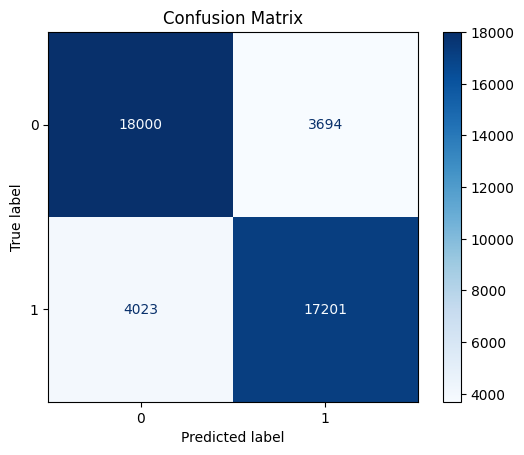

In [755]:
decision_tree(test=test, train=train)

Depth: 1     Test Accuracy: 0.718369914721096     Train Accuracy: 0.7223715598999244
Depth: 2     Test Accuracy: 0.7306724451279184     Train Accuracy: 0.7302205155059056
Depth: 3     Test Accuracy: 0.7395498392282959     Train Accuracy: 0.7424215977192063
Depth: 4     Test Accuracy: 0.7665781257281327     Train Accuracy: 0.7696398440681911
Depth: 5     Test Accuracy: 0.7818397875017475     Train Accuracy: 0.7872170826787689
Depth: 6     Test Accuracy: 0.7909967845659164     Train Accuracy: 0.8028684470820969
Depth: 7     Test Accuracy: 0.7988722680460413     Train Accuracy: 0.8113399662535637
Depth: 8     Test Accuracy: 0.8103825900554545     Train Accuracy: 0.8226333856984931
Depth: 9     Test Accuracy: 0.8199123910713454     Train Accuracy: 0.835317391051376
Depth: 10     Test Accuracy: 0.8272985693648353     Train Accuracy: 0.8490254261942165
Depth: 11     Test Accuracy: 0.8307004054242975     Train Accuracy: 0.8603363006923838
Depth: 12     Test Accuracy: 0.83365953679109     Trai

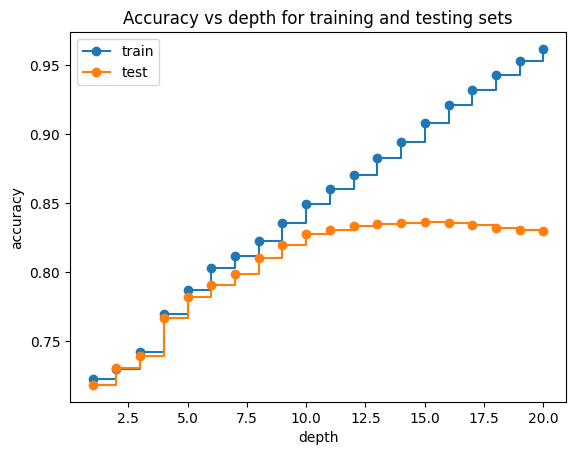

In [756]:
depth = decision_tree(test=test, train=train, loop='Depth', depth=20)

Alpha: 0.0     Test Accuracy: 0.8187706789691971     Train Accuracy: 0.9999941816489207
Alpha: 5.6567302159901235e-06     Test Accuracy: 0.8224055174984854     Train Accuracy: 0.9963111654157212
Alpha: 5.818351079304125e-06     Test Accuracy: 0.8245957407148515     Train Accuracy: 0.992843428172456
Alpha: 7.757801439072166e-06     Test Accuracy: 0.8260636562747565     Train Accuracy: 0.9872636294874033
Alpha: 8.311930113291608e-06     Test Accuracy: 0.8262267580036349     Train Accuracy: 0.9867923430499796
Alpha: 8.813338856827936e-06     Test Accuracy: 0.8265296612144089     Train Accuracy: 0.9840809914470239
Alpha: 9.697251798840209e-06     Test Accuracy: 0.8276014725756093     Train Accuracy: 0.979606679467039
Alpha: 1.0085141870793819e-05     Test Accuracy: 0.827741274057505     Train Accuracy: 0.9769826031302729
Alpha: 1.0473031942747429e-05     Test Accuracy: 0.8287664849247403     Train Accuracy: 0.9723861057776226
Alpha: 1.0805509147279092e-05     Test Accuracy: 0.8306538049303

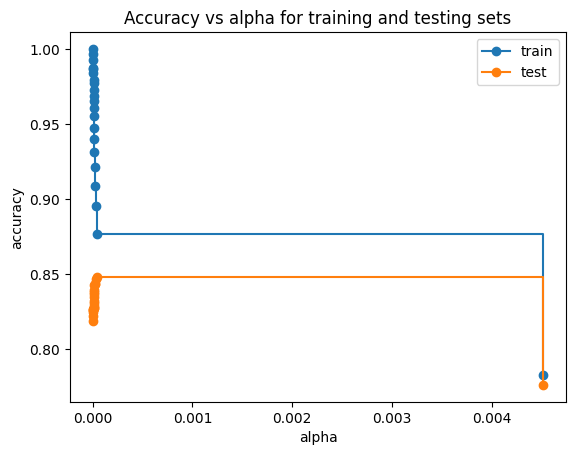

In [757]:
alpha = decision_tree(test=test, train=train, loop='Alpha')

Min split: 2     Test Accuracy: 0.8194230858847104     Train Accuracy: 0.9999941816489207
Min split: 102     Test Accuracy: 0.8393680973018314     Train Accuracy: 0.8951998603595741
Min split: 202     Test Accuracy: 0.8436553427466331     Train Accuracy: 0.8796474079245942
Min split: 302     Test Accuracy: 0.845798965469034     Train Accuracy: 0.8715598999243614
Min split: 402     Test Accuracy: 0.844214548674216     Train Accuracy: 0.8669924943271077
Min split: 502     Test Accuracy: 0.8447737546017988     Train Accuracy: 0.8630011054867051
Min split: 602     Test Accuracy: 0.8423971294095718     Train Accuracy: 0.8592249956362367
Min split: 702     Test Accuracy: 0.8409292138496668     Train Accuracy: 0.855192878338279
Min split: 802     Test Accuracy: 0.8407195116268232     Train Accuracy: 0.8536568336533427
Min split: 902     Test Accuracy: 0.8390418938440748     Train Accuracy: 0.8514225868388898

Best Train Accuracy:  0.9999941816489207    Best Train Param:  2
Best Test Accuracy:

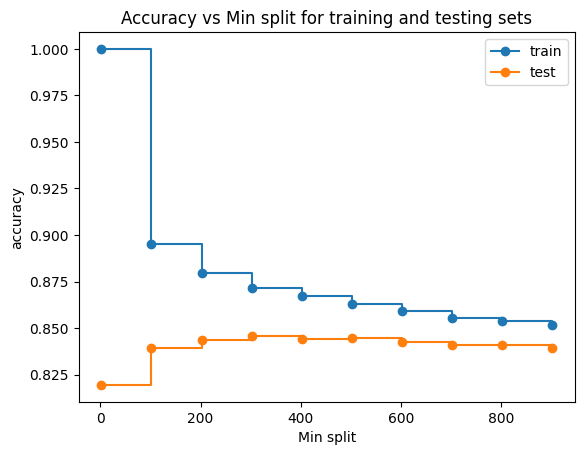

In [758]:
split = decision_tree(test=test, train=train, loop='Split', split=1000)

In [759]:
train.columns.shape[0]

117

PCA: 2     Test Accuracy: 0.6986579057738012     Train Accuracy: 0.9999941816489207
PCA: 3     Test Accuracy: 0.7198611305279836     Train Accuracy: 0.9999941816489207
PCA: 4     Test Accuracy: 0.7648772076984016     Train Accuracy: 0.9999941816489207
PCA: 5     Test Accuracy: 0.7567920219954332     Train Accuracy: 0.9999941816489207
PCA: 6     Test Accuracy: 0.7759215247681626     Train Accuracy: 0.9999941816489207
PCA: 7     Test Accuracy: 0.7848921198564704     Train Accuracy: 0.9999941816489207
PCA: 8     Test Accuracy: 0.7884337573978284     Train Accuracy: 0.9999941816489207
PCA: 9     Test Accuracy: 0.7724497879677524     Train Accuracy: 0.9999941816489207
PCA: 10     Test Accuracy: 0.7889929633254112     Train Accuracy: 0.9999941816489207
PCA: 11     Test Accuracy: 0.7994081737266415     Train Accuracy: 0.9999941816489207
PCA: 12     Test Accuracy: 0.7877580502353325     Train Accuracy: 0.9999941816489207
PCA: 13     Test Accuracy: 0.7913462882706557     Train Accuracy: 0.99999

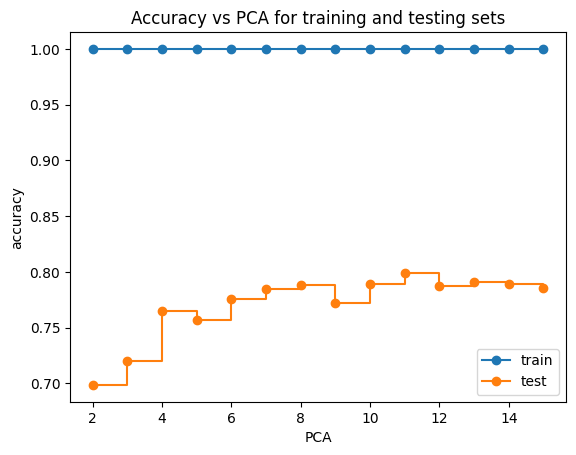

In [760]:
pca = decision_tree(test=test, train=train, loop='PCA', pca_number=15)

Train Precision:  0.8922363994159842    Train Recall:  0.8263313226804002     Train Fscore:  0.8580201694625547
Test Precision:  0.8685580161240943    Test Recall:  0.8020165849981153     Test Fscore:  0.8339620792709814


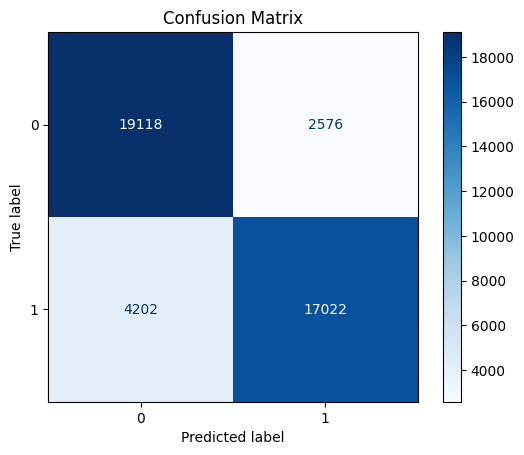

In [761]:
decision_tree(test=test, train=train, pca_number=pca, split=split, ccp_alpha=alpha)

Train Precision:  0.9018557854971444    Train Recall:  0.8336919585640881     Train Fscore:  0.8664353011621228
Test Precision:  0.8743161094224924    Test Recall:  0.8131831888428195     Test Fscore:  0.8426423200859291


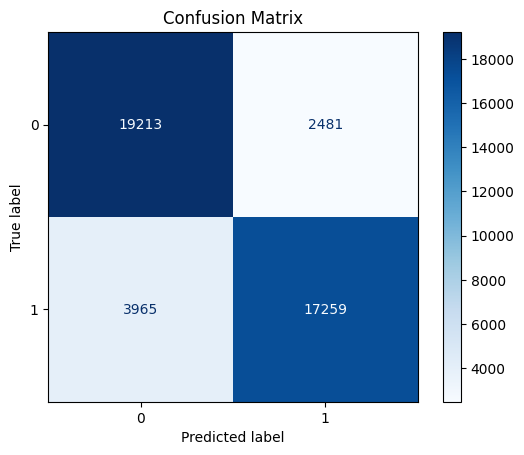

In [762]:
decision_tree(test=test, train=train, pca_number=pca, depth=depth, ccp_alpha=alpha)

Train Precision:  0.8986923971875158    Train Recall:  0.8355967876585888     Train Fscore:  0.8659968438305418
Test Precision:  0.8616931269596377    Test Recall:  0.8157745947983415     Test Fscore:  0.8381053803519133


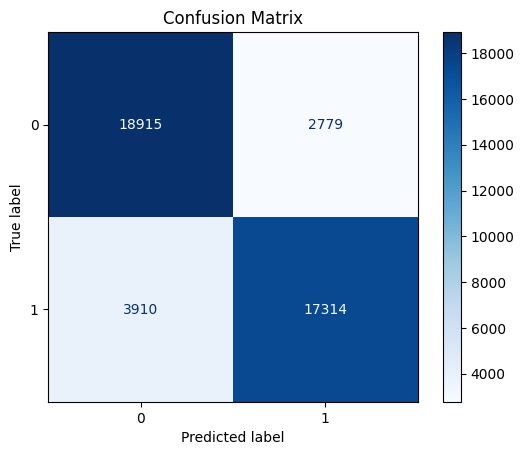

In [763]:
decision_tree(test=test, train=train, pca_number=pca, ccp_alpha=alpha)

Train Precision:  0.9474582135315381    Train Recall:  0.9337777934553835     Train Fscore:  0.9405682612248765
Test Precision:  0.8035580874112813    Test Recall:  0.8108273652468904     Test Fscore:  0.8071763602251407


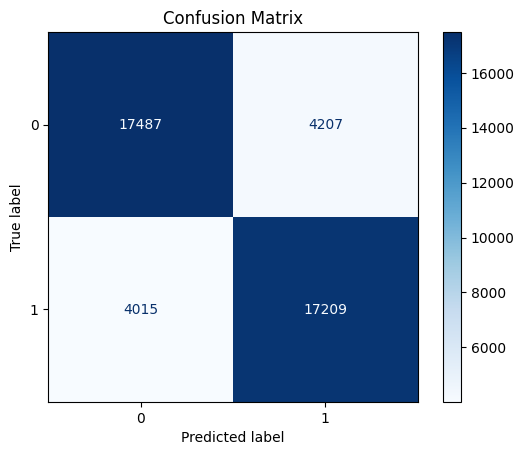

In [764]:
decision_tree(test=test, train=train, pca_number=pca, depth=depth)

Train Precision:  0.8987397063168848    Train Recall:  0.8225686973085471     Train Fscore:  0.8589688493793205
Test Precision:  0.858659246663575    Test Recall:  0.7851488880512627     Test Fscore:  0.8202603923112894


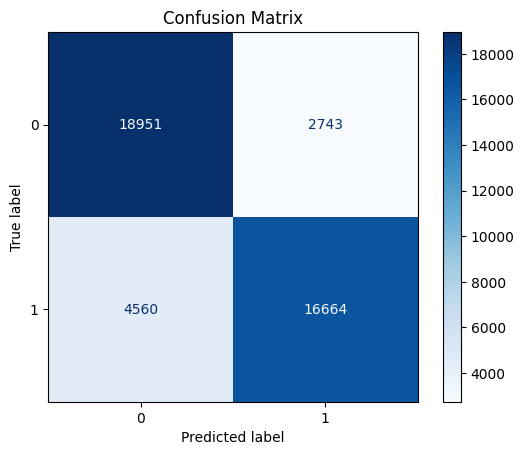

In [765]:
decision_tree(test=test, train=train, pca_number=pca, split=split)

Train Precision:  0.8890773913477371    Train Recall:  0.8380307359460063     Train Fscore:  0.8627996925144209
Test Precision:  0.8618967563291139    Test Recall:  0.8212872220128157     Test Fscore:  0.8411021038409573


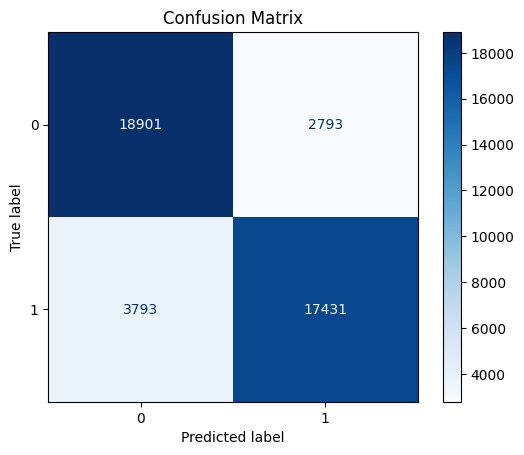

In [766]:
decision_tree(test=test, train=train, split=split, ccp_alpha=alpha)

Train Precision:  0.8850862377177517    Train Recall:  0.8441450021752678     Train Fscore:  0.8641309581126625
Test Precision:  0.8559380209865647    Test Recall:  0.8224651338107802     Test Fscore:  0.8388677975875823


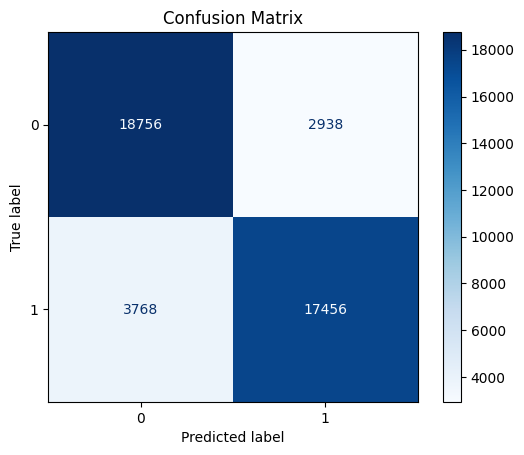

In [767]:
decision_tree(test=test, train=train, depth=depth, ccp_alpha=alpha)